Import library

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Read File CSV

In [8]:
df = pd.read_csv("auto-mpg.csv")

Handle Missing Value/Duplikat

In [9]:
df.isnull().sum()
df = df.dropna()
print("Total missing:", df.isnull().sum())
df.duplicated().sum()
df = df.drop_duplicates()
print("Jumlah duplikat:", df.duplicated().sum())

Total missing: mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64
Jumlah duplikat: 0


Tes Outlier

In [1]:
# Mengambil kolom numerik
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Hitung berapa banyak outlier
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = len(outliers)

print("Jumlah outlier per kolom numerik:")
for k, v in outlier_summary.items():
    print(f"{k}: {v} data")

NameError: name 'df' is not defined

Tes head

In [11]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Convert horsepower karena ada yang non integer

In [12]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

Feature Engineering

In [13]:
#Rasio Kekuatan ke berat mobil
df['power_to_weight'] = df['horsepower'] / df['weight']

# Kapasitas mesin per silinder
df['displacement_per_cyl'] = df['displacement'] / df['cylinders']

print(df[['horsepower', 'weight', 'power_to_weight','displacement_per_cyl']].head())

   horsepower  weight  power_to_weight  displacement_per_cyl
0       130.0    3504         0.037100                38.375
1       165.0    3693         0.044679                43.750
2       150.0    3436         0.043655                39.750
3       150.0    3433         0.043694                38.000
4       140.0    3449         0.040591                37.750


Rata-rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3 dari attribute bertipe angka

In [14]:
numeric_df = df.select_dtypes(include='number')

desc_stats = numeric_df.describe().T
desc_stats["Q1"] = numeric_df.quantile(0.25)
desc_stats["Q2"] = numeric_df.quantile(0.50)
desc_stats["Q3"] = numeric_df.quantile(0.75)

print(desc_stats)

                      count         mean         std          min         25%  \
mpg                   398.0    23.514573    7.815984     9.000000    17.50000   
cylinders             398.0     5.454774    1.701004     3.000000     4.00000   
displacement          398.0   193.425879  104.269838    68.000000   104.25000   
horsepower            392.0   104.469388   38.491160    46.000000    75.00000   
weight                398.0  2970.424623  846.841774  1613.000000  2223.75000   
acceleration          398.0    15.568090    2.757689     8.000000    13.82500   
model year            398.0    76.010050    3.697627    70.000000    73.00000   
origin                398.0     1.572864    0.802055     1.000000     1.00000   
power_to_weight       392.0     0.034833    0.005935     0.020557     0.03082   
displacement_per_cyl  398.0    33.365054    8.687268    17.000000    24.62500   

                              50%          75%         max          Q1  \
mpg                     23.000000 

10 record pertama dari dataset dengan attribute bertipe angka

In [15]:
print("\n10 Data Numerik:\n", df.select_dtypes(include=np.number).head(10))


10 Data Numerik:
     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   
5  15.0          8         429.0       198.0    4341          10.0   
6  14.0          8         454.0       220.0    4354           9.0   
7  14.0          8         440.0       215.0    4312           8.5   
8  14.0          8         455.0       225.0    4425          10.0   
9  15.0          8         390.0       190.0    3850           8.5   

   model year  origin  power_to_weight  displacement_per_cyl  
0          70       1         0.037100                38.375  
1          70       1         0.044679                43.750  
2          70       1

Informasi jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka

In [16]:
print("\nDataset info:")
print("Number of records:", df.shape[0])
print("Number of attributes:", df.shape[1])
print("Attribute names:", df.columns.tolist())
print("Number of numeric attributes:", df.select_dtypes(include=np.number).shape[1])


Dataset info:
Number of records: 398
Number of attributes: 11
Attribute names: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name', 'power_to_weight', 'displacement_per_cyl']
Number of numeric attributes: 10


Jumlah label dari semua attribute yang bernilai object.

In [17]:
object_columns = df.select_dtypes(include='object').columns
for col in object_columns:
    print(f"Unique labels in {col}: {df[col].nunique()}")

Unique labels in car name: 305


Diagram batang

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25024\4024146928.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cylinders', y='mpg', data=mpg_by_cyl, palette="viridis")


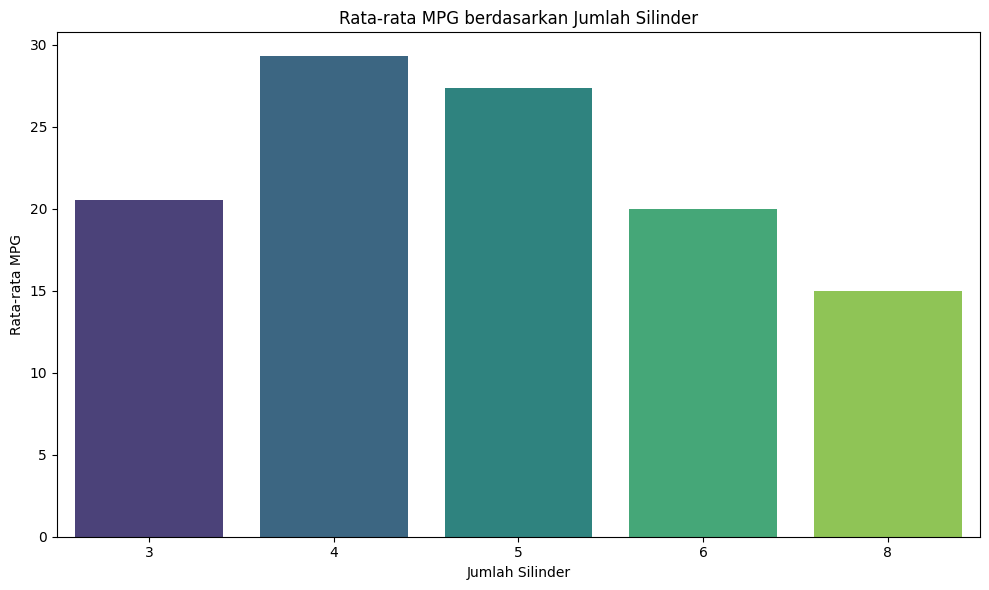

In [18]:
mpg_by_cyl = df.groupby('cylinders')['mpg'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='cylinders', y='mpg', data=mpg_by_cyl, palette="viridis")
plt.title('Rata-rata MPG berdasarkan Jumlah Silinder')
plt.xlabel('Jumlah Silinder')
plt.ylabel('Rata-rata MPG')
plt.tight_layout()
plt.show()

Heatmap

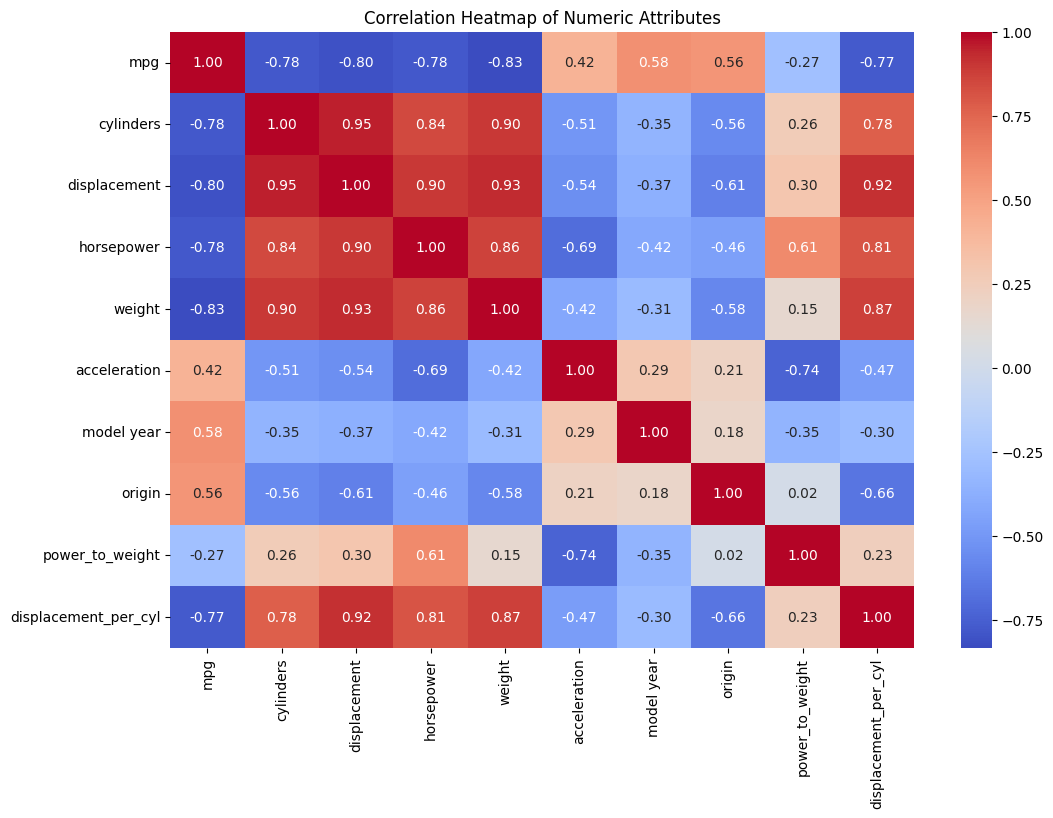

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Attributes')
plt.show()

Analisis dan kesimpulan
-Nilai MPG (Miles per Gallon) bervariasi tergantung jumlah silinder.  
-Kendaraan dengan jumlah silinder lebih sedikit cenderung memiliki MPG lebih tinggi, menunjukkan efisiensi bahan bakar lebih baik.
-Beberapa atribut seperti `displacement` dan `horsepower` juga berpengaruh terhadap MPG.
-Jumlah kendaraan dengan 4 silinder paling banyak dibandingkan dengan yang 6 atau 8 silinder.  
-Visualisasi batang menunjukkan tren jelas bahwa kendaraan dengan lebih banyak silinder umumnya lebih boros bahan bakar.

Encoding Kolom Kategorikal

In [20]:
df = pd.get_dummies(df, columns=['origin'])
print(df.head(30))

     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   18.0          8         307.0       130.0    3504          12.0   
1   15.0          8         350.0       165.0    3693          11.5   
2   18.0          8         318.0       150.0    3436          11.0   
3   16.0          8         304.0       150.0    3433          12.0   
4   17.0          8         302.0       140.0    3449          10.5   
5   15.0          8         429.0       198.0    4341          10.0   
6   14.0          8         454.0       220.0    4354           9.0   
7   14.0          8         440.0       215.0    4312           8.5   
8   14.0          8         455.0       225.0    4425          10.0   
9   15.0          8         390.0       190.0    3850           8.5   
10  15.0          8         383.0       170.0    3563          10.0   
11  14.0          8         340.0       160.0    3609           8.0   
12  15.0          8         400.0       150.0    3761           9.5   
13  14

Split data

In [28]:
X = df[['displacement','horsepower','weight','acceleration']]
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Jumlah data total:", len(df))
print("Training set:", len(X_train))
print("Testing set:", len(X_test))

Jumlah data total: 398
Training set: 318
Testing set: 80


Normalisasi Kolom Numerik

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)